In [1]:
import os
import neptune

In [2]:
project = neptune.init_project(
    project="gongjiawei105/PVSK-ML",
    api_token=os.path.expandvars("${NEPTUNE_API_TOKEN}"),
    mode="read-only"
)
runs_table_df = project.fetch_runs_table(
    columns=[
        "config/model/model_type",
        "metrics/train/r",
        "metrics/val/r",
        "validation/train/r_mean",
        "validation/test/r_mean",
        "config/experiment/test_size"
    ],
    query='(`sys/group_tags`:stringSet CONTAINS "bandgap") AND (`sys/tags`:stringSet CONTAINS "sweep")'
)
runs_df = runs_table_df.to_pandas()
runs_df

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/gongjiawei105/PVSK-ML/


,sys/creation_time,sys/id,config/experiment/test_size,config/model/model_type,metrics/train/r,metrics/val/r,validation/test/r_mean,validation/train/r_mean
0,2025-04-17 18:40:31.685,PVSKML-145,0.10,catboost,0.938694,0.863199,0.942560,0.983367
1,2025-04-17 18:16:20.741,PVSKML-144,0.10,xgboost,0.974041,0.898158,0.941748,0.976080
2,2025-04-17 18:11:09.409,PVSKML-143,0.30,xgboost,0.984838,0.899859,0.939011,0.986877
3,2025-04-17 02:42:48.859,PVSKML-142,0.30,catboost,0.965820,0.897785,0.949355,0.984607
4,2025-04-17 02:34:10.916,PVSKML-141,0.15,catboost,0.966726,0.922841,0.935788,0.984353
5,2025-04-17 02:30:35.520,PVSKML-140,0.15,xgboost,0.963961,0.915855,0.935042,0.967293
6,2025-04-17 02:17:42.549,PVSKML-139,0.10,xgboost,0.992027,0.918248,NaN,NaN
7,2025-04-17 01:58:44.346,PVSKML-138,0.10,catboost,0.993417,0.921306,NaN,NaN
8,2025-04-17 01:32:58.064,PVSKML-137,NaN,catboost,0.974225,0.898708,0.937966,0.977523
9,2025-04-17 01:28:19.601,PVSKML-136,NaN,catboost,0.953295,0.874766,0.937054,0.975302


In [3]:
runs_df.dropna(inplace=True)
runs_df.sort_values(
    by=["metrics/val/r","validation/test/r_mean"],
    ascending=False,
    inplace=True
)
runs_df

,sys/creation_time,sys/id,config/experiment/test_size,config/model/model_type,metrics/train/r,metrics/val/r,validation/test/r_mean,validation/train/r_mean
4,2025-04-17 02:34:10.916,PVSKML-141,0.15,catboost,0.966726,0.922841,0.935788,0.984353
5,2025-04-17 02:30:35.520,PVSKML-140,0.15,xgboost,0.963961,0.915855,0.935042,0.967293
2,2025-04-17 18:11:09.409,PVSKML-143,0.30,xgboost,0.984838,0.899859,0.939011,0.986877
1,2025-04-17 18:16:20.741,PVSKML-144,0.10,xgboost,0.974041,0.898158,0.941748,0.976080
3,2025-04-17 02:42:48.859,PVSKML-142,0.30,catboost,0.965820,0.897785,0.949355,0.984607
0,2025-04-17 18:40:31.685,PVSKML-145,0.10,catboost,0.938694,0.863199,0.942560,0.983367


In [4]:
group_df = runs_df.groupby("config/model/model_type")
group_df.get_group("catboost")

,sys/creation_time,sys/id,config/experiment/test_size,config/model/model_type,metrics/train/r,metrics/val/r,validation/test/r_mean,validation/train/r_mean
4,2025-04-17 02:34:10.916,PVSKML-141,0.15,catboost,0.966726,0.922841,0.935788,0.984353
3,2025-04-17 02:42:48.859,PVSKML-142,0.30,catboost,0.965820,0.897785,0.949355,0.984607
0,2025-04-17 18:40:31.685,PVSKML-145,0.10,catboost,0.938694,0.863199,0.942560,0.983367


In [5]:
group_df = runs_df.groupby("config/model/model_type")
group_df.get_group("xgboost")

,sys/creation_time,sys/id,config/experiment/test_size,config/model/model_type,metrics/train/r,metrics/val/r,validation/test/r_mean,validation/train/r_mean
5,2025-04-17 02:30:35.520,PVSKML-140,0.15,xgboost,0.963961,0.915855,0.935042,0.967293
2,2025-04-17 18:11:09.409,PVSKML-143,0.30,xgboost,0.984838,0.899859,0.939011,0.986877
1,2025-04-17 18:16:20.741,PVSKML-144,0.10,xgboost,0.974041,0.898158,0.941748,0.976080


In [6]:
run_id = group_df.get_group("catboost")["sys/id"].iloc[0]
run = neptune.init_run(
    with_id=run_id,
    mode="read-only"
)

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/gongjiawei105/PVSK-ML/e/PVSKML-141


In [7]:
import joblib
from tempfile import TemporaryDirectory
from perovskiteml.preprocessing import PrunerFactory, Preprocessor
from perovskiteml.experiments import ExperimentConfig
from perovskiteml.data import Dataset

In [8]:
with TemporaryDirectory() as tmp_dir:
    file_dir = tmp_dir + "model.joblib"
    run["model"].download(file_dir)
    model = joblib.load(file_dir)
    
    config_dir = tmp_dir + "config.toml"
    run["config/file"].download(config_dir)
    config = ExperimentConfig.load(config_dir)

In [9]:
run.stop()
project.stop()

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/gongjiawei105/PVSK-ML/e/PVSKML-141/metadata
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/gongjiawei105/PVSK-ML/metadata


In [10]:
dataset = Dataset.load("../" + config.data.path)
if config.pruning:
    pruner = PrunerFactory.create(config.pruning)
    pruner.prune(dataset)

X, y = dataset.split_target(config.data.target_feature)

if config.process:
    preprocessor = Preprocessor(config.process)
    X = preprocessor.preprocess(X, y)
    
X.head()

,Cs,FA,MA,Pb,Sn,I,Br
1,0.0,0.0,0.950,1.0,0.0,3.0,0.0
2,0.0,0.0,0.962,1.0,0.0,3.0,0.0
5,0.0,0.0,0.975,1.0,0.0,3.0,0.0
6,0.0,0.0,0.950,1.0,0.0,3.0,0.0
7,0.0,0.0,0.925,1.0,0.0,3.0,0.0


In [33]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from perovskiteml.plotting import plot_shap_dependence

In [12]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X, y)

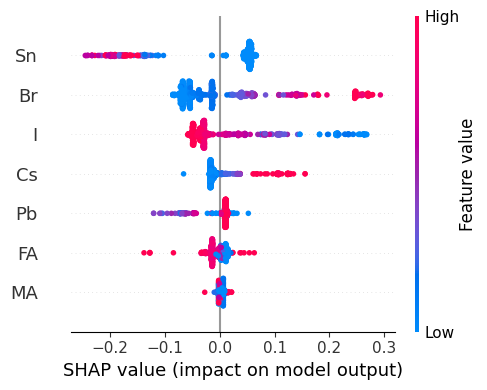

In [13]:
fig = plt.figure()
shap.summary_plot(
    shap_values,
    X,
    plot_size=[5, 4],
)

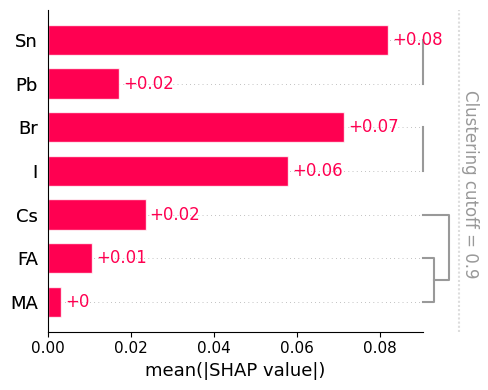

In [14]:
clustering = shap.utils.hclust(X, y)
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.9, show=False)
fig = plt.gcf()
fig.set_size_inches(5,4)
fig.tight_layout()
plt.show()

In [17]:
interaction = explainer(X, interactions=True)

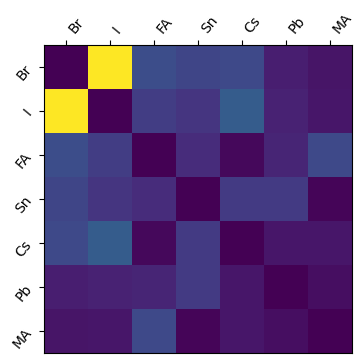

In [39]:
shap_interaction_values = explainer.shap_interaction_values(X)
interaction_matrix = np.abs(shap_interaction_values).sum(0)
for i in range(interaction_matrix.shape[0]):
    interaction_matrix[i, i] = 0
inds = np.argsort(-interaction_matrix.sum(0))
sorted_ia_matrix = interaction_matrix[inds, :][:, inds]
plt.figure(figsize=(4, 4))
plt.imshow(sorted_ia_matrix)
plt.yticks(
    range(sorted_ia_matrix.shape[0]),
    X.columns[inds],
    rotation=50.4,
    horizontalalignment="right",
)
plt.xticks(
    range(sorted_ia_matrix.shape[0]),
    X.columns[inds],
    rotation=50.4,
    horizontalalignment="left",
)
plt.gca().xaxis.tick_top()
plt.show()

In [ ]:
interaction_threshold = 2
feature_pairs = np.array([[ (a, b) for b in X.columns[inds] ] for a in X.columns[inds] ])
important_pairs = feature_pairs[np.where(sorted_ia_matrix > 1)]
important_pairs

array([['Br', 'I'],
       ['Br', 'FA'],
       ['Br', 'Sn'],
       ['Br', 'Cs'],
       ['I', 'Br'],
       ['I', 'FA'],
       ['I', 'Sn'],
       ['I', 'Cs'],
       ['FA', 'Br'],
       ['FA', 'I'],
       ['FA', 'MA'],
       ['Sn', 'Br'],
       ['Sn', 'I'],
       ['Sn', 'Cs'],
       ['Sn', 'Pb'],
       ['Cs', 'Br'],
       ['Cs', 'I'],
       ['Cs', 'Sn'],
       ['Pb', 'Sn'],
       ['MA', 'FA']], dtype='<U2')

C:\Users\Violet\Documents\GitHub\PerovskiteML\src\perovskiteml\plotting\_shap.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(tight_layout=True, figsize=figsize)


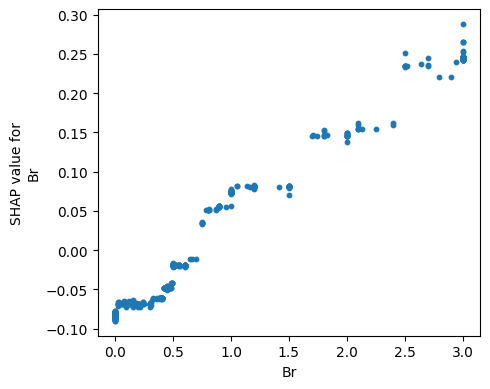

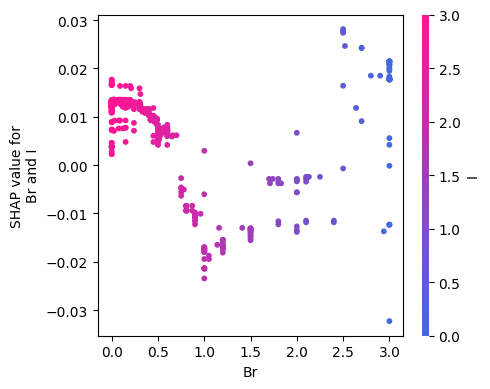

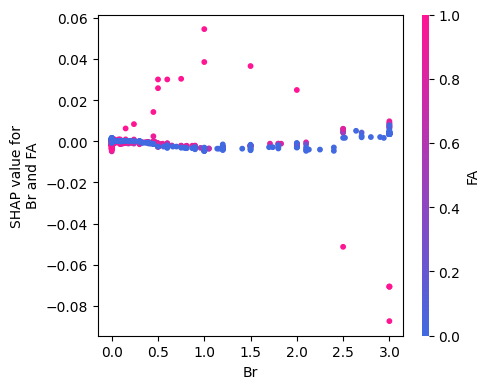

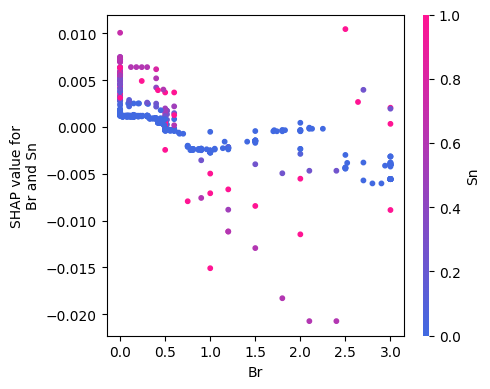

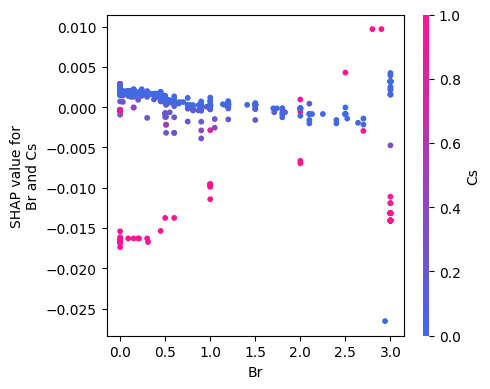

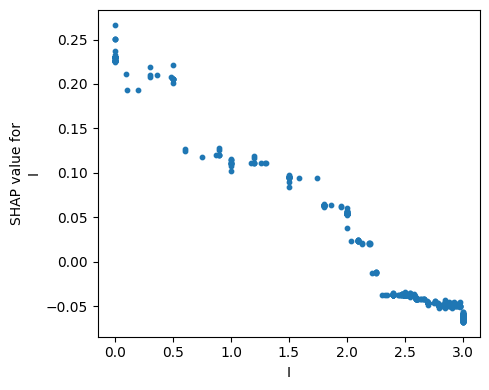

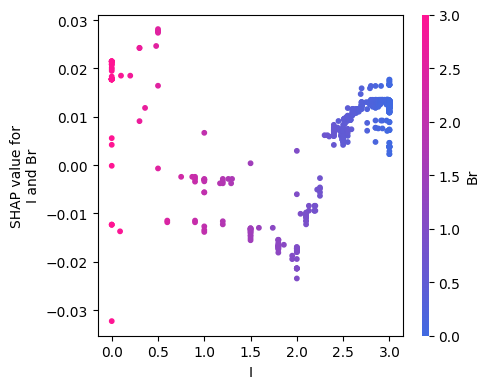

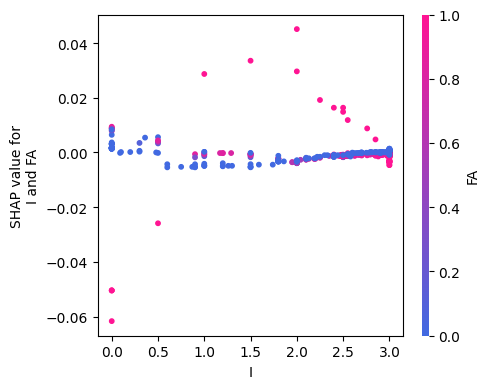

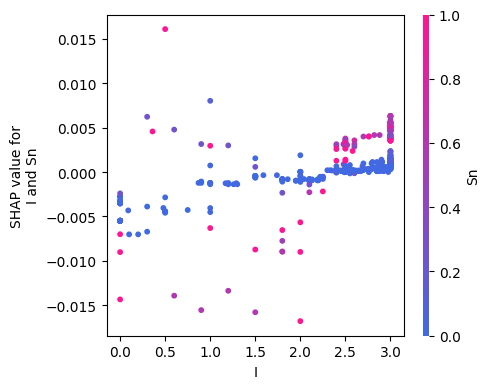

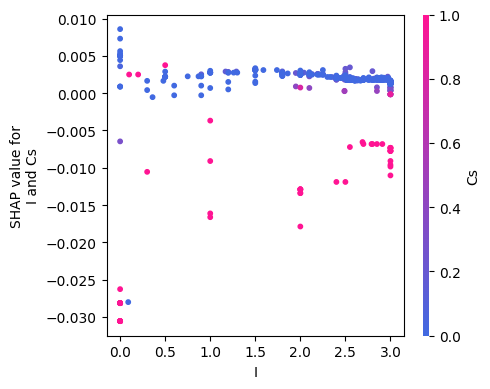

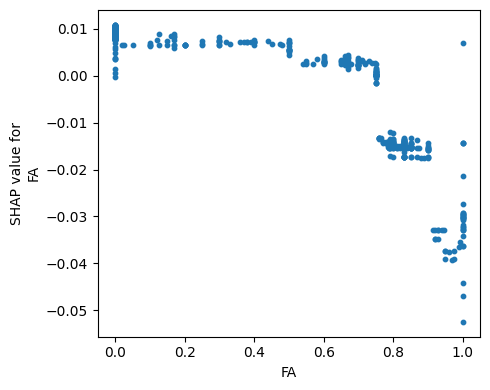

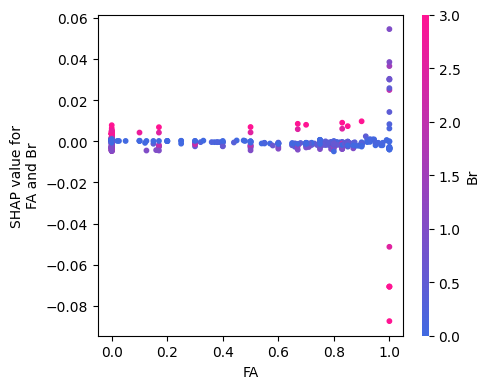

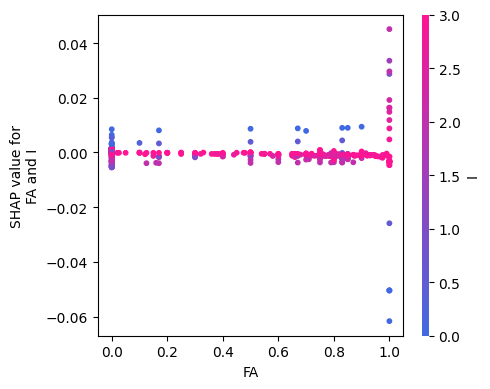

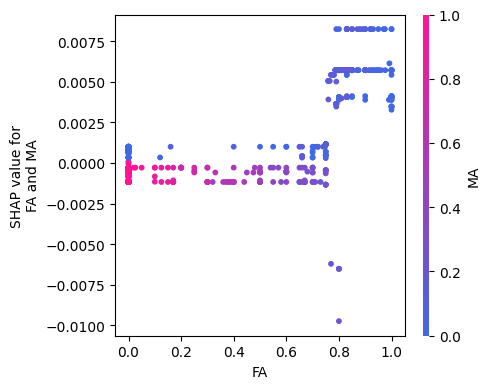

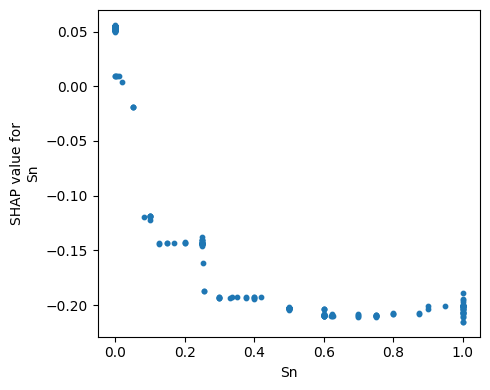

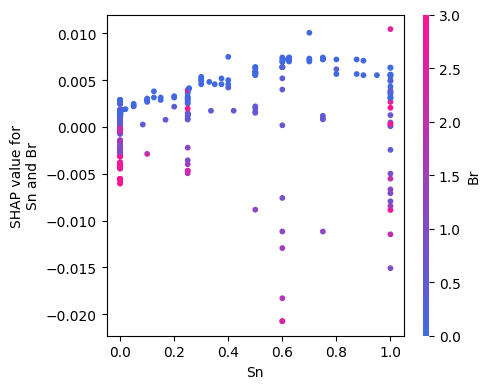

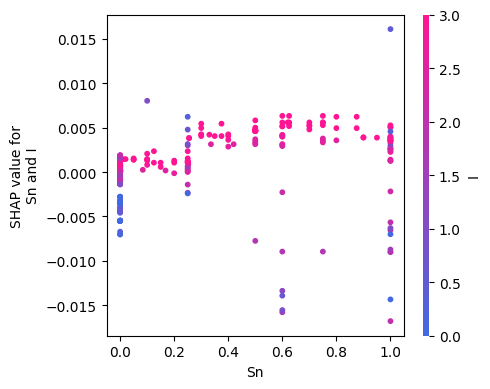

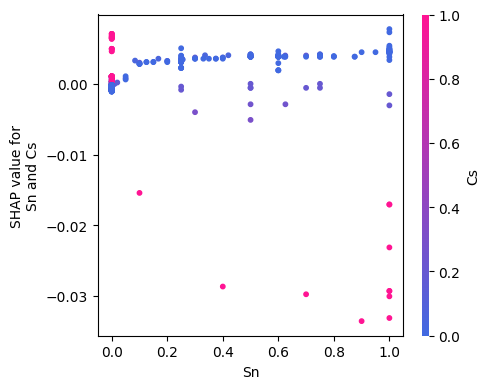

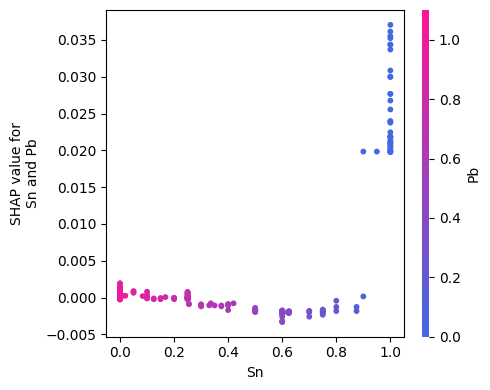

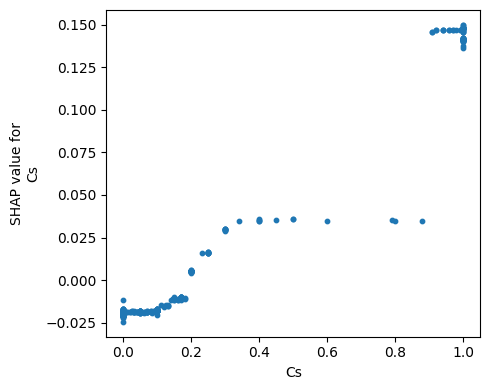

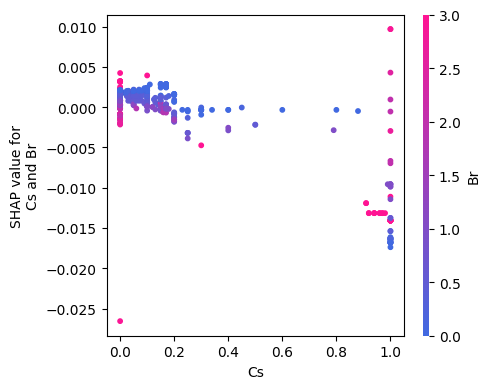

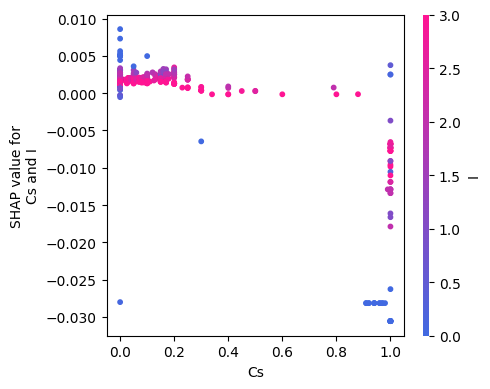

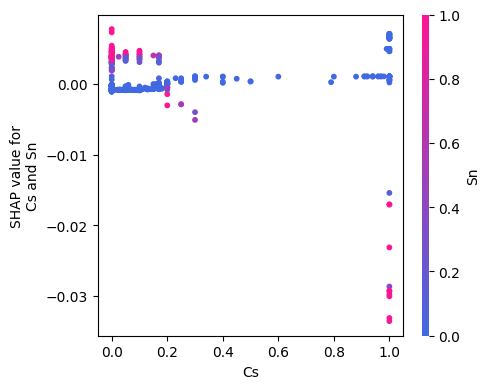

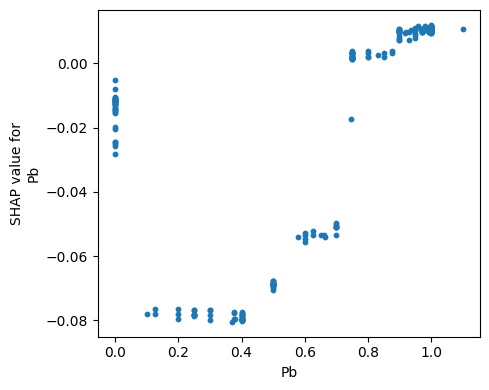

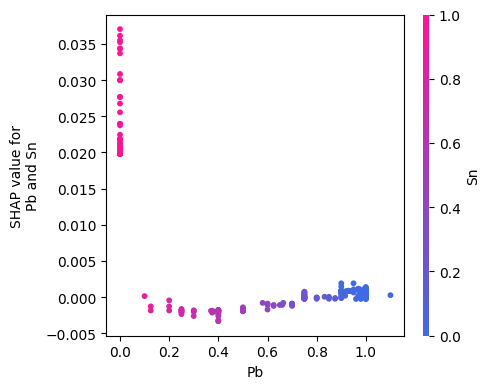

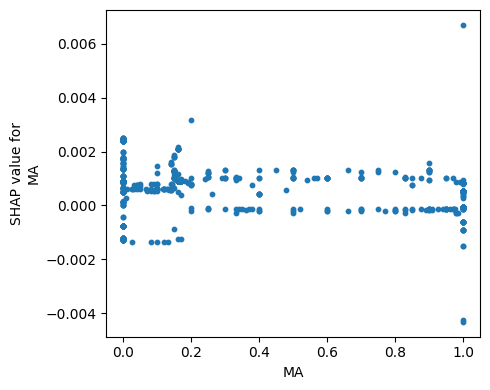

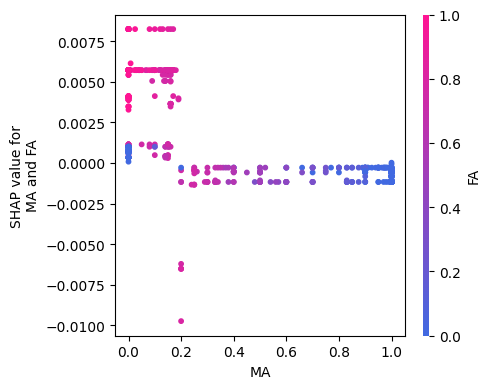

In [65]:
seen_index = set()
for ind1, ind2 in important_pairs:
    if ind1 not in seen_index:
        plot_shap_dependence((ind1, ind1), interaction)
        seen_index.add(ind1)
    plot_shap_dependence((ind1, ind2), interaction, cind=ind2)

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='Br', ylabel='SHAP value for\nBr'>)

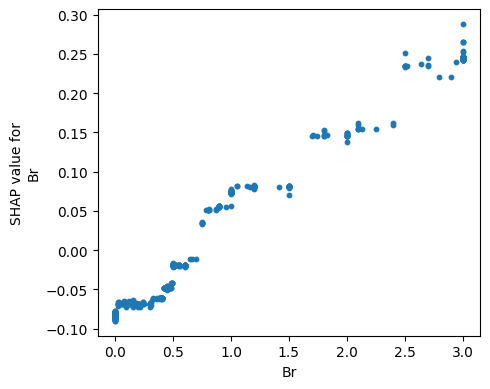

In [ ]:
plot_shap_dependence(("Br", "Br"), interaction)

(<Figure size 500x400 with 2 Axes>,
 <Axes: xlabel='Br', ylabel='SHAP value for\nBr and I'>)

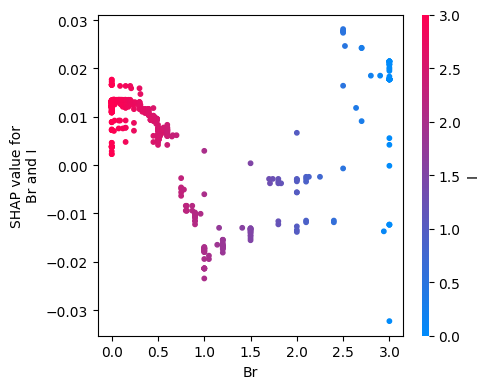

In [18]:
plot_shap_dependence(("Br", "I"), interaction, cind="I", cmap="shap")

(<Figure size 500x400 with 2 Axes>,
 <Axes: xlabel='Br', ylabel='SHAP value for\nBr and Pb'>)

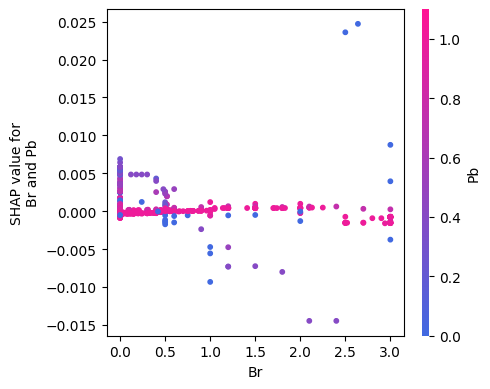

In [25]:
plot_shap_dependence(("Br", "Pb"), interaction, cind="Pb")

(<Figure size 500x400 with 2 Axes>,
 <Axes: xlabel='Br', ylabel='SHAP value for\nBr and Cs'>)

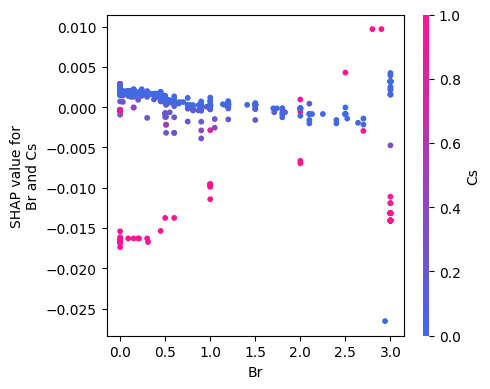

In [32]:
plot_shap_dependence(("Br", "Cs"), interaction, cind="Cs")

In [ ]:
# Plots all interactions *Not Recommended*
# for ind1 in X.columns:
#     for ind2 in X.columns:
#         if ind1 == ind2:
#             plot_shap_dependence((ind1, ind1), interaction)
            
#         else:
#             plot_shap_dependence((ind1, ind2), interaction, cind=ind2)